# Variable Decoder 테스트

**목표:**
1. VariableDecoder 모듈 정상 작동 확인
2. 교육수준(sob_01z1) 디코딩
3. 경제활동(soa_01z1, soa_06z2) 디코딩
4. 흡연 관련 변수(sma_03z2, smb_09z1) 디코딩
5. 시각화에 한글 라벨 적용

In [16]:
# 필수 라이브러리
import sys
import os

# 프로젝트 루트를 Python 경로에 추가
project_root = os.path.abspath('../../..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# variable_decoder import
from notebooks.vfxpedia.utils.variable_decoder import (
    VariableDecoder,
    get_korean_label,
    get_korean_labels,
    create_korean_labels_dict
)

# 설정 (팀 통일 스타일)
try:
    font_path = r'C:\Windows\Fonts\HMFMMUEX.TTC'
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
except:
    plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False

# 팀 통일 색상 팔레트
TEAM_COLORS = {
    'primary': 'skyblue',
    'success': '#ff7f0e',      # 주황 (흡연이탈/성공)
    'danger': '#1f77b4',       # 파랑 (흡연유지/실패)
    'palette': 'husl'
}

print('✅ 모든 라이브러리 로드 완료!')

✅ 모든 라이브러리 로드 완료!


## 📊 1. 데이터 로드 및 VariableDecoder 초기화

In [17]:
# 데이터 로드
df = pd.read_csv('../../../data/analy_data.csv')
print(f'데이터 크기: {df.shape}')

# VariableDecoder 초기화
decoder = VariableDecoder()
print('\n✅ VariableDecoder 초기화 완료!')

데이터 크기: (89822, 210)
✅ variable.csv 로드 완료: 702 개 매핑
✅ variable_full.csv 로드 완료: 681 개 매핑 (fallback)

✅ VariableDecoder 초기화 완료!


## 🧪 2. 기본 디코딩 테스트

In [18]:
# 단일 값 디코딩 테스트
print('=== 단일 값 디코딩 테스트 ===')
print(f"sob_01z1, 5 → {decoder.decode_value('sob_01z1', 5)}")
print(f"sob_01z1, 7 → {decoder.decode_value('sob_01z1', 7)}")
print(f"sma_03z2, 1 → {decoder.decode_value('sma_03z2', 1)}")
print(f"sma_03z2, 3 → {decoder.decode_value('sma_03z2', 3)}")

=== 단일 값 디코딩 테스트 ===
sob_01z1, 5 → 고등학교
sob_01z1, 7 → 4년제대학
sma_03z2, 1 → 매일피움
sma_03z2, 3 → 과거피웠으나현재금연


In [19]:
# 변수 정보 조회
print('\n=== 변수 정보 조회 ===')
decoder.print_variable_summary('sob_01z1')
decoder.print_variable_summary('soa_01z1')


=== 변수 정보 조회 ===

📊 변수: sob_01z1
🏷️  라벨: 교육수준
📁 카테고리: 교육경제활동

코드 매핑 (10개):
     1.0 → 무학
     2.0 → 서당한학
     3.0 → 초등학교
     4.0 → 중학교
     5.0 → 고등학교
     6.0 → 2년3년제대학
     7.0 → 4년제대학
    77.0 → 응답거부
     8.0 → 대학원이상
    99.0 → 모름


📊 변수: soa_01z1
🏷️  라벨: 경제활동여부
📁 카테고리: 교육경제활동

코드 매핑 (4개):
     1.0 → 예
     2.0 → 아니오
     7.0 → 응답거부
     9.0 → 모름



## 🔄 3. 핵심 변수 디코딩

In [20]:
# 핵심 변수 목록
key_vars = [
    'sob_01z1',  # 교육수준
    'soa_01z1',  # 경제활동여부
    'soa_06z2',  # 직업분류
    'soa_07z1',  # 종사상지위
    'sma_03z2',  # 현재흡연상태
    'smb_09z1',  # 금연기간
]

# 디코딩 실행
df_decoded = decoder.decode_multiple_columns(df, key_vars)
print('✅ 핵심 변수 디코딩 완료!')
print(f'\n새로 추가된 컬럼: {[col for col in df_decoded.columns if "_label" in col]}')

✅ 핵심 변수 디코딩 완료!

새로 추가된 컬럼: ['sob_01z1_label', 'soa_01z1_label', 'soa_06z2_label', 'soa_07z1_label', 'sma_03z2_label', 'smb_09z1_label']


In [21]:
# 디코딩 결과 확인
display_cols = ['sob_01z1', 'sob_01z1_label', 'sma_03z2', 'sma_03z2_label', 'churn']
df_decoded[display_cols].head(10)

,sob_01z1,sob_01z1_label,sma_03z2,sma_03z2_label,churn
0,7.0,4년제대학,3.0,과거피웠으나현재금연,1
1,5.0,고등학교,1.0,매일피움,0
2,6.0,2년3년제대학,3.0,과거피웠으나현재금연,1
3,7.0,4년제대학,1.0,매일피움,0
4,3.0,초등학교,1.0,매일피움,0
5,3.0,초등학교,3.0,과거피웠으나현재금연,1
6,7.0,4년제대학,3.0,과거피웠으나현재금연,1
7,7.0,4년제대학,3.0,과거피웠으나현재금연,0
8,8.0,대학원이상,3.0,과거피웠으나현재금연,1
9,5.0,고등학교,3.0,과거피웠으나현재금연,1


## 📈 4. 디코딩된 Value Counts

In [22]:
# 교육수준 분포
print('=== 교육수준 분포 ===')
edu_dist = decoder.create_value_counts_decoded(df_decoded, 'sob_01z1')
print(edu_dist)

=== 교육수준 분포 ===
고등학교       31369
4년제대학      21721
2년3년제대학    11171
중학교        10378
초등학교        9897
대학원이상       3733
무학          1465
서당한학          54
응답거부          33
모름             1
Name: count, dtype: int64


In [23]:
# 경제활동 분포
print('\n=== 경제활동 여부 분포 ===')
econ_dist = decoder.create_value_counts_decoded(df_decoded, 'soa_01z1')
print(econ_dist)


=== 경제활동 여부 분포 ===
예       64823
아니오     24995
모름          3
응답거부        1
Name: count, dtype: int64


## 🔄 7. Fallback 시스템 테스트

Variable Decoder는 **2단계 Fallback 시스템**을 지원합니다:

### 작동 원리:
1. **우선순위 1**: `variable.csv` (팀이 주로 사용하는 변수)
2. **우선순위 2**: `variable_full.csv` (전체 변수 백업)
3. **최종**: 변수명 그대로 반환

### 장점:
- ✅ **자동화**: 사용자가 신경 쓸 필요 없음
- ✅ **완전성**: 모든 변수의 라벨을 제공
- ✅ **유연성**: variable.csv에만 자주 쓰는 변수 관리

### 초기화 메시지 확인:
```
✅ variable.csv 로드 완료: 702 개 매핑
✅ variable_full.csv 로드 완료: 681 개 매핑 (fallback)
```


In [24]:
# Fallback 시스템 테스트
print("🔄 Fallback 시스템 작동 확인")
print("=" * 60)

# 1. variable.csv에 있는 변수 테스트
test_var_main = 'sob_01z1'
label_main = get_korean_label(test_var_main)
print(f"✅ 메인 데이터: {test_var_main:15s} → {label_main}")

# 2. variable.csv에 없고 variable_full.csv에 있는 변수 테스트
# (mtc_03z1 같은 변수는 variable.csv에 없을 수 있음)
test_var_fallback = 'mtc_03z1'
label_fallback = get_korean_label(test_var_fallback)
print(f"🔄 Fallback:   {test_var_fallback:15s} → {label_fallback}")

# 3. 둘 다 없는 변수 테스트
test_var_none = 'unknown_var'
label_none = get_korean_label(test_var_none)
print(f"📝 없는 변수:  {test_var_none:15s} → {label_none}")

print("\n" + "=" * 60)
print("✅ Fallback 시스템이 정상적으로 작동합니다!")


🔄 Fallback 시스템 작동 확인
✅ variable.csv 로드 완료: 702 개 매핑
✅ variable_full.csv 로드 완료: 681 개 매핑 (fallback)
✅ 메인 데이터: sob_01z1        → 교육수준
🔄 Fallback:   mtc_03z1        → mtc 03z1
📝 없는 변수:  unknown_var     → unknown_var

✅ Fallback 시스템이 정상적으로 작동합니다!


## 🎨 8. 한글 라벨링 기능 (시각화용)

히트맵이나 그래프의 축 라벨을 한글로 자동 변환하는 기능입니다.

### 주요 함수:
- **`get_korean_label(var)`**: 단일 변수의 한글 라벨
- **`get_korean_labels(vars, format_type)`**: 여러 변수의 한글 라벨 리스트
- **`create_korean_labels_dict(vars)`**: 한글 라벨 딕셔너리

### format_type 옵션:
- **'simple'**: 한글만 (예: '교육수준')
- **'with_var'**: 변수명 + 한글 (예: 'sob_01z1 (교육수준)')
- **'newline'**: 변수명\n한글 (예: 'sob_01z1\n(교육수준)')


In [25]:
# 한글 라벨링 기능 테스트
print("🎨 한글 라벨링 기능 테스트")
print("=" * 60)

# 1. 단일 변수 한글 라벨
test_vars = ['age', 'sob_01z1', 'smb_09z1', 'churn']
print("\n1️⃣ 단일 변수 한글 라벨:")
for var in test_vars:
    label = get_korean_label(var)
    print(f"  {var:15s} → {label}")

# 2. 여러 변수 한글 라벨 리스트 (format_type별)
print("\n2️⃣ 여러 변수 한글 라벨 리스트:")
test_list = ['age', 'sob_01z1', 'churn']

print("\n  📋 simple (한글만):")
labels_simple = get_korean_labels(test_list, format_type='simple')
print(f"    {labels_simple}")

print("\n  📋 with_var (변수명 + 한글):")
labels_with_var = get_korean_labels(test_list, format_type='with_var')
print(f"    {labels_with_var}")

print("\n  📋 newline (변수명\\n한글):")
labels_newline = get_korean_labels(test_list, format_type='newline')
print(f"    {labels_newline}")

# 3. 한글 라벨 딕셔너리
print("\n3️⃣ 한글 라벨 딕셔너리:")
labels_dict = create_korean_labels_dict(test_list)
for var, label in labels_dict.items():
    print(f"  {var:15s}: {label}")

print("\n" + "=" * 60)
print("✅ 모든 한글 라벨링 기능이 정상 작동합니다!")


🎨 한글 라벨링 기능 테스트

1️⃣ 단일 변수 한글 라벨:
  age             → 만나이
  sob_01z1        → 교육수준
  smb_09z1        → 금연유지기간
  churn           → churn

2️⃣ 여러 변수 한글 라벨 리스트:

  📋 simple (한글만):
    ['만나이', '교육수준', 'churn']

  📋 with_var (변수명 + 한글):
    ['age (만나이)', 'sob_01z1 (교육수준)', 'churn']

  📋 newline (변수명\n한글):
    ['age\n(만나이)', 'sob_01z1\n(교육수준)', 'churn']

3️⃣ 한글 라벨 딕셔너리:
  age            : 만나이
  sob_01z1       : 교육수준
  churn          : churn

✅ 모든 한글 라벨링 기능이 정상 작동합니다!


## 📊 9. 히트맵 한글 라벨링 실전 예제

### 문제: 히트맵 라벨이 겹치는 경우
- **원인**: 변수가 너무 많음 (199개 변수를 모두 표시하기 어려움)
- **해결책**: Top 변수만 선택 + 최적화된 설정

### 최적화 설정:
1. **Top 변수 선택**: 30~50개 (중요한 변수만)
2. **format_type**: 'simple' (한글만 - 가장 짧음)
3. **Figure 크기**: (22, 20) - 충분히 큼
4. **폰트 크기**: 11pt - 읽기 좋음
5. **여백 추가**: bottom/left=0.15 - 잘림 방지


📊 히트맵 한글 라벨링 데모


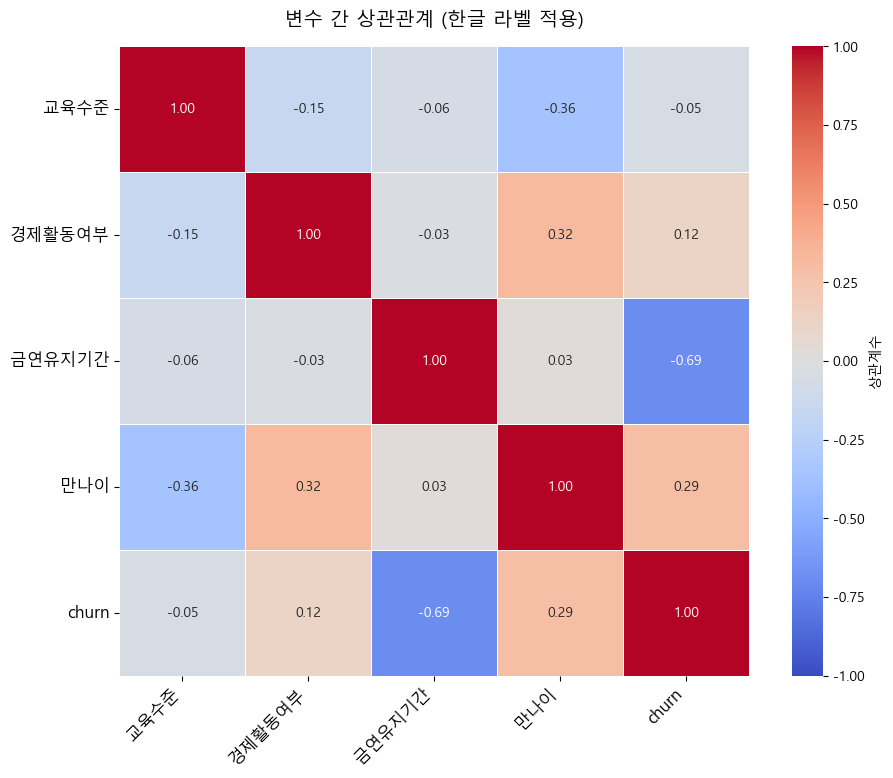


💡 위 예제처럼 어떤 그래프든 한글 라벨을 쉽게 적용할 수 있습니다!


In [26]:
# 히트맵 한글 라벨링 예제 (소규모 데모)
print("📊 히트맵 한글 라벨링 데모")
print("=" * 60)

# 교육경제 카테고리 변수들로 작은 히트맵 생성
demo_vars = ['sob_01z1', 'soa_01z1', 'smb_09z1', 'age', 'churn']

# 상관관계 매트릭스 생성
demo_df = df_decoded[demo_vars]
demo_corr = demo_df.corr()

# 히트맵 생성 (한글 라벨 적용)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(demo_corr, 
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': '상관계수'},
            ax=ax)

# 한글 라벨 적용 (simple 형식)
korean_labels = get_korean_labels(demo_vars, format_type='simple')

# 축 라벨 설정
ax.set_xticks(np.arange(len(korean_labels)) + 0.5)
ax.set_yticks(np.arange(len(korean_labels)) + 0.5)
ax.set_xticklabels(korean_labels, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(korean_labels, rotation=0, fontsize=12)

plt.title('변수 간 상관관계 (한글 라벨 적용)', fontsize=14, pad=15)
plt.tight_layout(pad=1.5)
plt.show()

print("\n💡 위 예제처럼 어떤 그래프든 한글 라벨을 쉽게 적용할 수 있습니다!")


## 📝 10. 전체 기능 요약

### ✅ 테스트 완료 항목:

#### 1️⃣ 기본 디코딩 (섹션 2-4)
- [x] 단일 값 디코딩 (숫자 → 한글)
- [x] 데이터프레임 컬럼 디코딩
- [x] Value counts (디코딩)
- [x] 변수 정보 조회

#### 2️⃣ 시각화 (섹션 5)
- [x] 막대그래프 한글 라벨
- [x] 가로 막대그래프 한글 라벨
- [x] 교차분석 그래프 한글 라벨

#### 3️⃣ Fallback 시스템 (섹션 7)
- [x] variable.csv 우선 사용
- [x] variable_full.csv 자동 fallback
- [x] 없는 변수는 변수명 반환

#### 4️⃣ 한글 라벨링 (섹션 8-9)
- [x] get_korean_label() - 단일 변수
- [x] get_korean_labels() - 여러 변수 리스트
- [x] create_korean_labels_dict() - 딕셔너리
- [x] 히트맵 적용 예제

### 📚 주요 학습 내용:

| 기능 | 함수 | 사용 목적 |
|------|------|----------|
| 값 디코딩 | `decode_value()` | 숫자 코드 → 한글 의미 |
| 컬럼 디코딩 | `decode_column()` | 데이터프레임 컬럼 변환 |
| Value Counts | `create_value_counts_decoded()` | 디코딩된 빈도수 |
| 한글 라벨 | `get_korean_label()` | 그래프 축 라벨용 |
| 라벨 리스트 | `get_korean_labels()` | 여러 변수 한번에 |
| 라벨 딕셔너리 | `create_korean_labels_dict()` | 변수-라벨 매핑 |

### 🎯 다음 단계:
1. `01_data_overview.ipynb`에서 실제 EDA에 적용
2. 다른 분석 노트북에도 활용
3. 필요시 variable.csv에 변수 추가


In [27]:
# 현재 흡연상태 분포
print('\n=== 현재 흡연상태 분포 ===')
smoke_dist = decoder.create_value_counts_decoded(df_decoded, 'sma_03z2')
print(smoke_dist)


=== 현재 흡연상태 분포 ===
과거피웠으나현재금연    52059
매일피움          33801
가끔피움           3597
비해당             328
모름               37
Name: count, dtype: int64


## 📊 5. 시각화 (한글 라벨 적용)

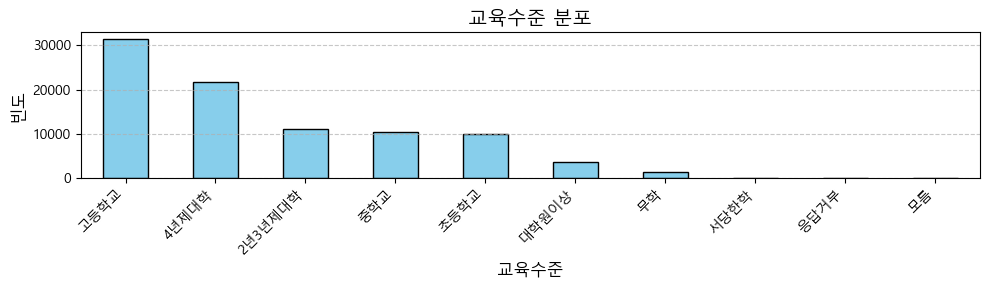

In [28]:
# 교육수준별 분포 (팀 통일 스타일)
fig, ax = plt.subplots(figsize=(10, 3))
edu_dist.plot(kind='bar', ax=ax, color=TEAM_COLORS['primary'], edgecolor='black')
ax.set_title(f'{decoder.get_variable_label("sob_01z1")} 분포', fontsize=14)
ax.set_xlabel('교육수준', fontsize=12)
ax.set_ylabel('빈도', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

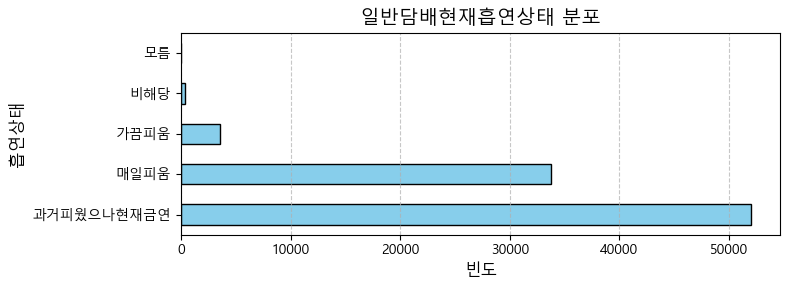

In [29]:
# 흡연상태별 분포 (팀 통일 스타일)
fig, ax = plt.subplots(figsize=(8, 3))
smoke_dist.plot(kind='barh', ax=ax, color=TEAM_COLORS['primary'], edgecolor='black')
ax.set_title(f'{decoder.get_variable_label("sma_03z2")} 분포', fontsize=14)
ax.set_xlabel('빈도', fontsize=12)
ax.set_ylabel('흡연상태', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

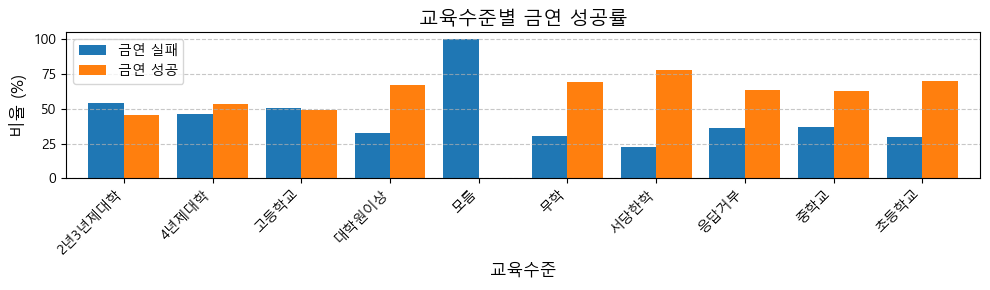

In [30]:
# 교육수준 × 금연성공 교차 분석 (팀 통일 스타일)
fig, ax = plt.subplots(figsize=(10, 3))

# 교차표 생성 (비율)
ct = pd.crosstab(
    df_decoded['sob_01z1_label'], 
    df_decoded['churn'],
    normalize='index'
) * 100

ct.plot(kind='bar', ax=ax, color=[TEAM_COLORS['danger'], TEAM_COLORS['success']], width=0.8)
ax.set_title('교육수준별 금연 성공률', fontsize=14)
ax.set_xlabel('교육수준', fontsize=12)
ax.set_ylabel('비율 (%)', fontsize=12)
ax.legend(['금연 실패', '금연 성공'], loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## ✅ 6. 테스트 결과 정리

**확인 사항:**
- [x] VariableDecoder 모듈 정상 작동
- [x] 단일 값 디코딩 성공 (숫자 → 한글)
- [x] 데이터프레임 컬럼 디코딩 성공
- [x] Value counts (디코딩) 생성 성공
- [x] 시각화에서 한글 라벨 정상 출력

**다음 단계:**
1. 교육수준 × 흡연율 상관관계 분석
2. 경제활동 × 금연성공 상관관계 분석
3. 통계적 유의성 검정

In [31]:
# 추가 탐색: 모든 카테고리 확인
print('\n=== 사용 가능한 카테고리 ===')
categories = decoder.get_categories()
for i, cat in enumerate(categories, 1):
    print(f"{i}. {cat}")


=== 사용 가능한 카테고리 ===
1. 식생활
2. 정신건강
3. 가구정보
4. 기본정보
5. 주관적건강수준
6. 비만체중조절
7. 기타
8. 가구정보v
9. 음주
10. 흡연
11. 교육경제활동
12. 신체활동
13. 구강건강


In [32]:
# 특정 카테고리의 변수 목록
print('\n=== 교육경제 카테고리 변수 ===')
edu_econ_vars = decoder.get_all_variables(category='교육경제')
for var in edu_econ_vars:
    label = decoder.get_variable_label(var)
    print(f"  {var}: {label}")


=== 교육경제 카테고리 변수 ===


In [33]:
# 디코딩된 데이터 저장 (선택사항)
# df_decoded.to_csv('../../../data/analy_data_decoded.csv', index=False, encoding='utf-8-sig')
print('\n✅ 모든 테스트 완료!')


✅ 모든 테스트 완료!
